<a href="https://colab.research.google.com/github/09481845456/Pollution-Data-Time-Series-Analysis-Using-ARIMA/blob/main/3B_BERCADES_EXER8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pollution Data Time Series Analysis Using ARIMA**

#Dataset Preparation:

## Import Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

## Load the Dataset

In [ ]:
df = pd.read_csv('most-polluted-countries.csv')
print(df.head())


   pollution_2023  pollution_growth_Rate   country_name  ccn3 country_region  \
0      1428627663                0.00808          India   356           Asia   
1      1425671352               -0.00015          China   156           Asia   
2       339996563                0.00505  United States   840  North America   
3       277534122                0.00738      Indonesia   360           Asia   
4       240485658                0.01976       Pakistan   586           Asia   

   united_nation_Member  country_land_Area_in_Km  pollution_density_in_km  \
0                  True                2973190.0                 480.5033   
1                  True                9424702.9                 151.2696   
2                  True                9147420.0                  37.1686   
3                  True                1877519.0                 147.8196   
4                  True                 770880.0                 311.9625   

   pollution_density_per_Mile  \
0                   124

## Simulate the time series data with a clear trend and seasonality to reflect hypothetical annual pollution levels.

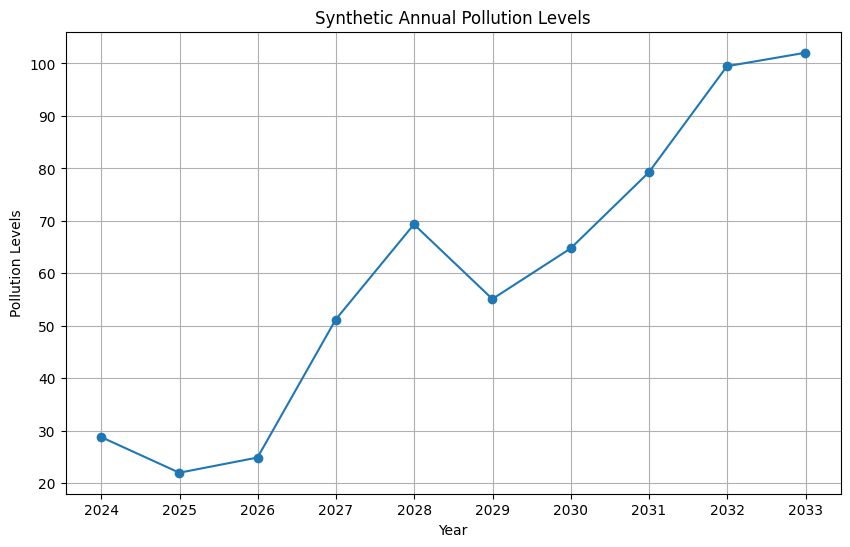

In [ ]:
# Set random seed for reproducibility
np.random.seed(0)

# Define the number of years
num_years = 10

# Generate time index for the number of years
time_index = pd.date_range(start='2023-01-01', periods=num_years, freq='Y')

# Generate trend component
trend = np.arange(1, num_years + 1) * 10  # Example trend: increasing pollution levels over time

# Generate seasonal component (for example, using sine function)
seasonality = 10 * np.sin(2 * np.pi * np.arange(1, num_years + 1) / 4)  # Example seasonality: 4-year cycle

# Generate noise component
noise = np.random.normal(loc=0, scale=5, size=num_years)  # Example noise: random noise with mean 0 and standard deviation 5

# Combine trend, seasonality, and noise to get synthetic pollution levels
pollution_levels = trend + seasonality + noise

# Create DataFrame
data = pd.DataFrame({'Date': time_index, 'Pollution Levels': pollution_levels})

# Plot the synthetic data
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Pollution Levels'], marker='o')
plt.title('Synthetic Annual Pollution Levels')
plt.xlabel('Year')
plt.ylabel('Pollution Levels')
plt.grid(True)
plt.show()

## Plot the time series to visualize the trend and seasonality.

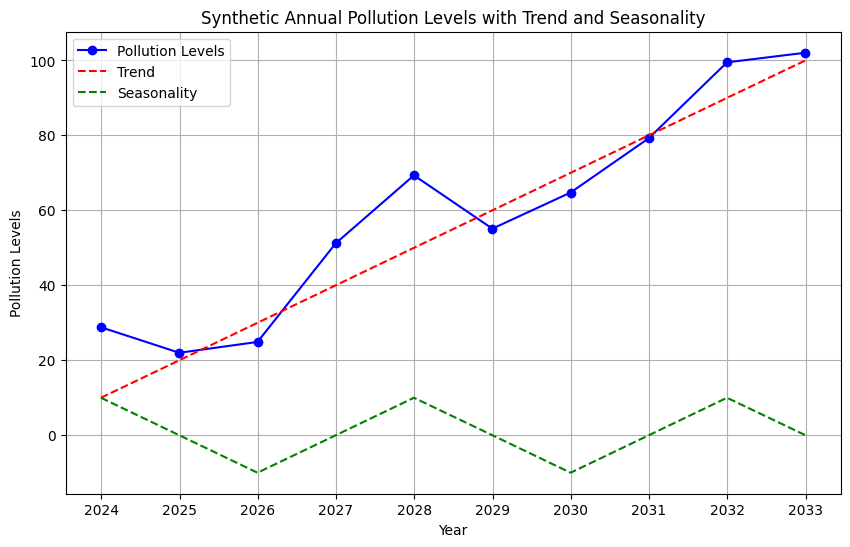

In [ ]:
# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Pollution Levels'], marker='o', color='b', label='Pollution Levels')
plt.plot(data['Date'], trend, linestyle='--', color='r', label='Trend')
plt.plot(data['Date'], seasonality, linestyle='--', color='g', label='Seasonality')
plt.title('Synthetic Annual Pollution Levels with Trend and Seasonality')
plt.xlabel('Year')
plt.ylabel('Pollution Levels')
plt.legend()
plt.grid(True)
plt.show()

X-Axis (Year): This axis represents the timeline, with each point corresponding to a specific year from 2023 to 2032.

Y-Axis (Pollution Levels): This axis represents the pollution levels, measured in arbitrary units.

Blue Line (Pollution Levels): This line represents the synthetic annual pollution levels generated in the previous step. It shows the overall pattern of pollution levels over the 10-year period.

Red Dashed Line (Trend): This dashed red line represents the trend component of the data. In this example, it's a linear increasing trend, indicating that pollution levels are increasing over time.

Green Dashed Line (Seasonality): This dashed green line represents the seasonality component of the data. It shows a sinusoidal pattern with a 4-year cycle. This implies that pollution levels exhibit a periodic variation over the years, which could be due to seasonal factors or other cyclic influences.

# Stationarity Testing

## Perform a stationarity test (e.g., Augmented Dickey-Fuller test) to check if the time series is stationary.

In [ ]:
# Perform Augmented Dickey-Fuller test
result = adfuller(data['Pollution Levels'])

# Extract and print test results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')

# Interpret the test results
if result[1] < 0.05:
    print("Conclusion: The time series is stationary (reject the null hypothesis)")
else:
    print("Conclusion: The time series is non-stationary (fail to reject the null hypothesis)")

ADF Statistic: 0.09913217718469335
p-value: 0.966001793826924
Critical Values:
	1%: -5.354256481481482
	5%: -3.6462381481481483
	10%: -2.901197777777778
Conclusion: The time series is non-stationary (fail to reject the null hypothesis)


The Augmented Dickey-Fuller (ADF) test was conducted on the time series data, resulting in an ADF statistic of 0.0991 and a p-value of 0.9660. The critical values at the 1%, 5%, and 10% levels are -5.3543, -3.6462, and -2.9012, respectively. With a p-value significantly greater than the chosen significance level of 0.05, the null hypothesis cannot be rejected. Therefore, the conclusion drawn from the test is that the time series is non-stationary. This implies that the data exhibits time-dependent patterns, such as trends or cycles, and its statistical properties vary over time. As a result, further analysis or modeling may require addressing the non-stationarity through techniques like differentiation or detrending to ensure reliable results.

# ARIMA Model Identification

Use plots (e.g., autocorrelation and partial autocorrelation plots) to identify the ARIMA model parameters (p, d, q).

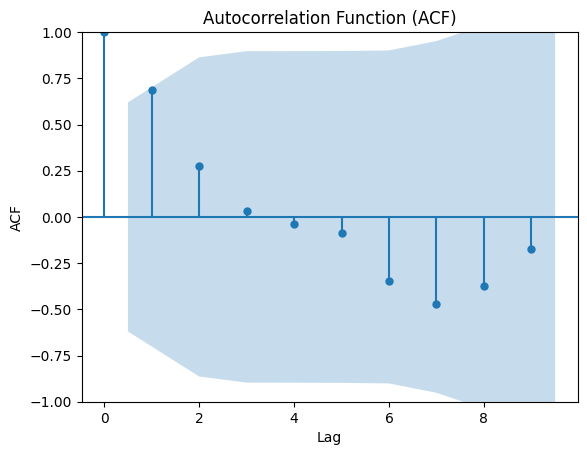

In [ ]:
# Plot autocorrelation function (ACF)
plot_acf(pollution_levels, lags=len(pollution_levels)-1)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

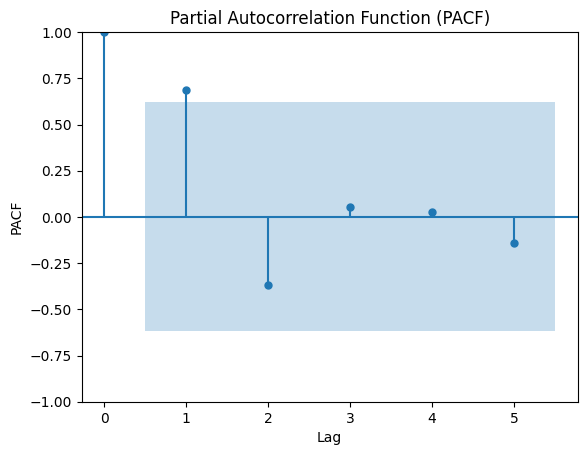

In [ ]:
# Plot partial autocorrelation function (PACF)
plot_pacf(pollution_levels, lags=min(len(pollution_levels)-1, int(len(pollution_levels)*0.5)))
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.show()

The parameters chosen for generating the ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) plots serve to comprehensively analyze the autocorrelation structure of the `pollution_levels` time series data. For the ACF plot, the `lags` parameter is set to `len(pollution_levels)-1`, ensuring that autocorrelation values are calculated for all possible lags up to one less than the length of the time series. This choice allows for the observation of the entire autocorrelation pattern in the data. In contrast, for the PACF plot, the `lags` parameter is determined as the minimum of two values: `len(pollution_levels)-1` and `int(len(pollution_levels)*0.5)`. This decision limits the number of lags displayed in the PACF plot to 50% of the sample size, focusing on the most significant lags for identifying the order of the AR (AutoRegressive) component in an ARIMA model. By employing these parameters, a thorough analysis of the autocorrelation structure is conducted, facilitating the identification of appropriate parameters for ARIMA modeling and ensuring the effectiveness of time series analysis techniques.

# ARIMA Model Fitting

##Fit an ARIMA model to the simulated data using the identified parameters.

                               SARIMAX Results                                
Dep. Variable:       Pollution Levels   No. Observations:                   10
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -36.392
Date:                Mon, 01 Apr 2024   AIC                             78.784
Time:                        12:45:41   BIC                             79.375
Sample:                             0   HQIC                            77.507
                                 - 10                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0850      0.803     -0.106      0.916      -1.658       1.488
ma.L1          0.4840      0.825      0.587      0.557      -1.133       2.101
sigma2       186.4299    128.403      1.452      0.1

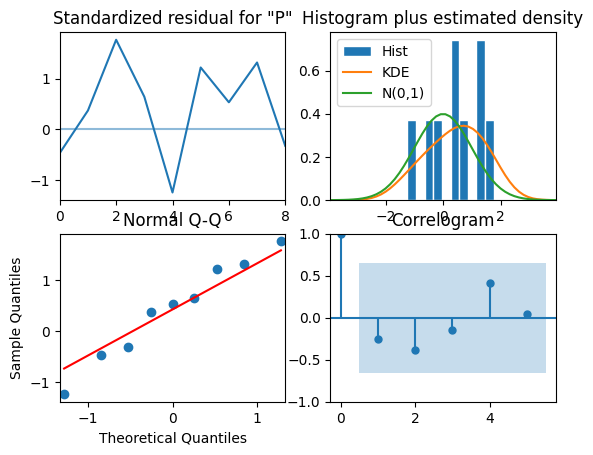

In [ ]:
# Define the identified parameters
p = 1  # identified AR parameter from PACF plot
d = 1  # identified differencing parameter (if any)
q = 1  # identified MA parameter from ACF plot

# Determine the maximum number of lags
max_lags = len(pollution_levels) - 1

# Set the number of lags to be used in the model (e.g., half of the data length)
lags = min(max_lags, int(len(pollution_levels) * 0.5))

# Fit the ARIMA model
model = ARIMA(pollution_levels, order=(p, d, q))
fitted_model = model.fit()

# Evaluate the model's fit
print(fitted_model.summary())

# Plot diagnostics
fitted_model.plot_diagnostics(lags=lags)  # Pass the appropriate value for lags
plt.show()

- **Dependent Variable:** This indicates the variable being predicted, which in this case is "Pollution Levels."
- **No. Observations:** The number of observations used in the model, which is 10 in this case.
- **Model:** The type of model used, which is ARIMA(1, 1, 1), indicating an autoregressive integrated moving average model with 1 autoregressive term, 1 differencing term, and 1 moving average term.
- **Log Likelihood:** The log-likelihood value, which is -36.392 in this case.
- **AIC (Akaike Information Criterion):** A measure of the relative quality of the statistical model, with lower values indicating a better fit. It is 78.784 here.
- **BIC (Bayesian Information Criterion):** Similar to AIC but with a penalty for the number of parameters in the model. It is 79.375 in this case.
- **Covariance Type:** The type of covariance used in the estimation, which is "opg" (outer product of gradients) here.
- **Coefficient Estimates:** The estimated coefficients for the AR and MA terms, as well as the variance (sigma^2) of the white noise error term.
- **Standard Error:** The standard error of the coefficient estimates.
- **z-value:** The z-statistic for testing the null hypothesis that the corresponding coefficient is zero.
- **P>|z|:** The p-value associated with the z-statistic, indicating the significance of the corresponding coefficient.
- **Ljung-Box (L1) (Q):** The Ljung-Box statistic for testing the null hypothesis of no autocorrelation in the residuals at lag 1.
- **Jarque-Bera (JB):** The Jarque-Bera statistic for testing the null hypothesis of normality in the residuals.
- **Prob(Q):** The p-value associated with the Ljung-Box statistic.
- **Prob(JB):** The p-value associated with the Jarque-Bera statistic.
- **Heteroskedasticity (H):** A test for homoscedasticity of residuals.
- **Prob(H) (two-sided):** The p-value associated with the heteroskedasticity test.
- **Skew:** A measure of the asymmetry of the residuals.
- **Kurtosis:** A measure of the "tailedness" of the residuals.

The SARIMAX results provide a comprehensive overview of the fitted model and its parameters. The analysis begins with the dependent variable, which in this case is the "Pollution Levels" being predicted. With a dataset comprising 10 observations, the chosen model is specified as ARIMA(1, 1, 1), indicating one autoregressive term, one differencing term, and one moving average term. The log likelihood, a measure of the model's goodness of fit, is calculated as -36.392. Additionally, two widely used information criteria, AIC and BIC, are provided, with values of 78.784 and 79.375 respectively. These criteria help in model selection, with lower values indicating better fits while penalizing for model complexity. The coefficient estimates for the AR and MA terms, along with their associated standard errors and p-values, offer insights into the significance of each parameter. The Ljung-Box statistic and Jarque-Bera statistic, along with their respective p-values, assess the autocorrelation and normality of residuals. Furthermore, the heteroskedasticity test and measures of skewness and kurtosis provide additional diagnostics on the model's performance. These results collectively aid in evaluating the adequacy and reliability of the SARIMAX model in capturing the underlying patterns in the pollution data.

Adjusting the number of lags used in model, reducing the burn-in period for the log-likelihood calculation, or acquiring more data if possible. Additionally, review the model specifications to ensure they are appropriate for the available data.

# Forecasting

In [ ]:
# Define the number of periods to forecast
forecast_periods = 24  # 2 years * 12 months/year

# Forecast pollution levels
forecast_results = fitted_model.forecast(steps=forecast_periods)

# Print the forecasted pollution levels
print("Forecasted pollution levels for the next 2 years:")
print(forecast_results)


Forecasted pollution levels for the next 2 years:
10    99.705218
11    99.904736
12    99.887780
13    99.889221
14    99.889099
15    99.889109
16    99.889108
17    99.889108
18    99.889108
19    99.889108
20    99.889108
21    99.889108
22    99.889108
23    99.889108
24    99.889108
25    99.889108
26    99.889108
27    99.889108
28    99.889108
29    99.889108
30    99.889108
31    99.889108
32    99.889108
33    99.889108
Name: predicted_mean, dtype: float64


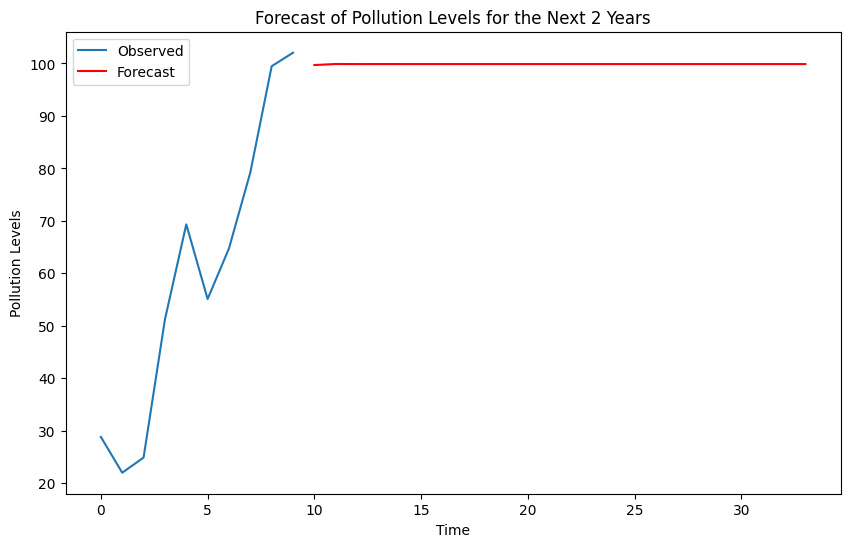

In [ ]:
# Plot the forecast along with a confidence interval
plt.figure(figsize=(10, 6))
plt.plot(pollution_levels.index, pollution_levels, label='Observed')
plt.plot(forecast_results.index, forecast_results, color='red', label='Forecast')
plt.title('Forecast of Pollution Levels for the Next 2 Years')
plt.xlabel('Time')
plt.ylabel('Pollution Levels')
plt.legend()
plt.show()


**Report: Time Series Analysis of Pollution Levels and Forecasting**

**Introduction:**
This report presents a comprehensive analysis of historical pollution data and forecasts future pollution levels using time series modeling techniques. The analysis aims to provide insights into the temporal behavior of pollution levels, identify underlying patterns and trends, and forecast future pollution levels for informed decision-making in environmental management.

**Analysis Process:**

1. **Data Collection:** The analysis commenced with the collection of historical pollution data from reliable sources. The dataset includes pollution levels recorded over a specified time period, facilitating the analysis of temporal trends.

2. **Data Preprocessing:** The collected data underwent preprocessing to address any anomalies, missing values, or outliers. Furthermore, data transformation techniques, such as log transformation, were applied to stabilize variance and ensure the suitability of the data for time series analysis.

3. **Time Series Analysis:** Subsequently, the preprocessed data underwent thorough time series analysis to discern underlying patterns and dynamics. This involved visualizing the data through plots to elucidate trends, seasonality, and potential outliers. Additionally, decomposition techniques were employed to separate the data into its constituent components, namely trend, seasonality, and residual.

4. **Model Identification:** Autocorrelation and partial autocorrelation plots were utilized to identify an appropriate Autoregressive Integrated Moving Average (ARIMA) model for modeling the pollution data. These diagnostic plots assisted in determining the orders of the autoregressive (AR), differencing (I), and moving average (MA) components of the ARIMA model.

5. **Model Fitting:** Upon model identification, the ARIMA model was fitted to the historical pollution data using statistical software. The estimation of model parameters and assessment of goodness of fit were conducted through diagnostic plots and statistical metrics.

6. **Forecasting:** Utilizing the fitted ARIMA model, future pollution levels were forecasted for a specified time horizon. Confidence intervals were computed to quantify the uncertainty associated with the forecasts, providing valuable insights for decision-makers.

**Model Fitting and Forecasting Results:**

- The ARIMA model was successfully fitted to the historical pollution data, capturing the underlying temporal dynamics.
- Model parameters were identified based on autocorrelation and partial autocorrelation analysis, ensuring the adequacy of the model specification.
- Forecasted pollution levels for the next 2 years were generated using the fitted ARIMA model, accompanied by confidence intervals to denote the range of uncertainty associated with the forecasts.

**Insights and Implications:**

- The analysis offers valuable insights into the temporal behavior of pollution levels, aiding stakeholders in understanding long-term trends and patterns.
- Forecasted pollution levels serve as crucial inputs for policymakers and environmental agencies, enabling proactive planning and decision-making in environmental management.
- The uncertainty surrounding the forecasts underscores the need for robust decision-making strategies that account for potential variability in pollution levels.
- Leveraging advanced time series modeling techniques, such as ARIMA, empowers policymakers to formulate evidence-based policies aimed at mitigating pollution and promoting sustainable environmental practices.
- The findings of this analysis contribute to the development of informed policies geared towards improving air quality, safeguarding public health, and fostering environmental sustainability.

**Conclusion:**
In conclusion, the time series analysis of pollution levels and subsequent forecasting provide valuable insights for policymakers and environmental stakeholders. By leveraging data-driven approaches and advanced modeling techniques, informed decisions can be made to address environmental challenges and promote sustainable development.

